# Cifar100

Epoch 1/150
390/390 [==============================] - 61s 147ms/step - loss: 4.3156 - accuracy: 0.0929 - val_loss: 3.8118 - val_accuracy: 0.1291
Epoch 2/150
390/390 [==============================] - 57s 145ms/step - loss: 3.5325 - accuracy: 0.1734 - val_loss: 3.1912 - val_accuracy: 0.2315
Epoch 3/150
390/390 [==============================] - 44s 114ms/step - loss: 3.1307 - accuracy: 0.2348 - val_loss: 2.6954 - val_accuracy: 0.3099
Epoch 4/150
390/390 [==============================] - 46s 116ms/step - loss: 2.8431 - accuracy: 0.2845 - val_loss: 2.7288 - val_accuracy: 0.3151
Epoch 5/150
390/390 [==============================] - 45s 116ms/step - loss: 2.6551 - accuracy: 0.3210 - val_loss: 2.4345 - val_accuracy: 0.3724
Epoch 6/150
390/390 [==============================] - 44s 111ms/step - loss: 2.5097 - accuracy: 0.3517 - val_loss: 2.4104 - val_accuracy: 0.3771
Epoch 7/150
390/390 [==============================] - 45s 114ms/step - loss: 2.4053 - accuracy: 0.3714 - val_loss: 2.3523 -

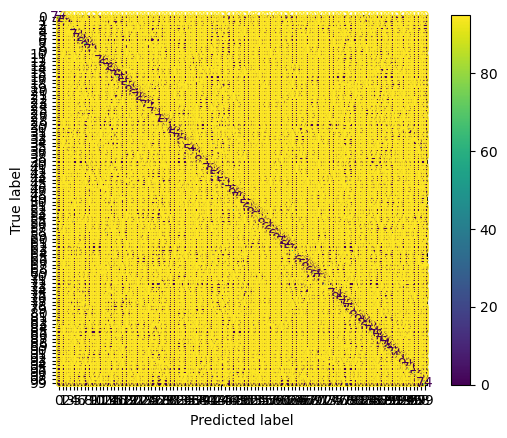

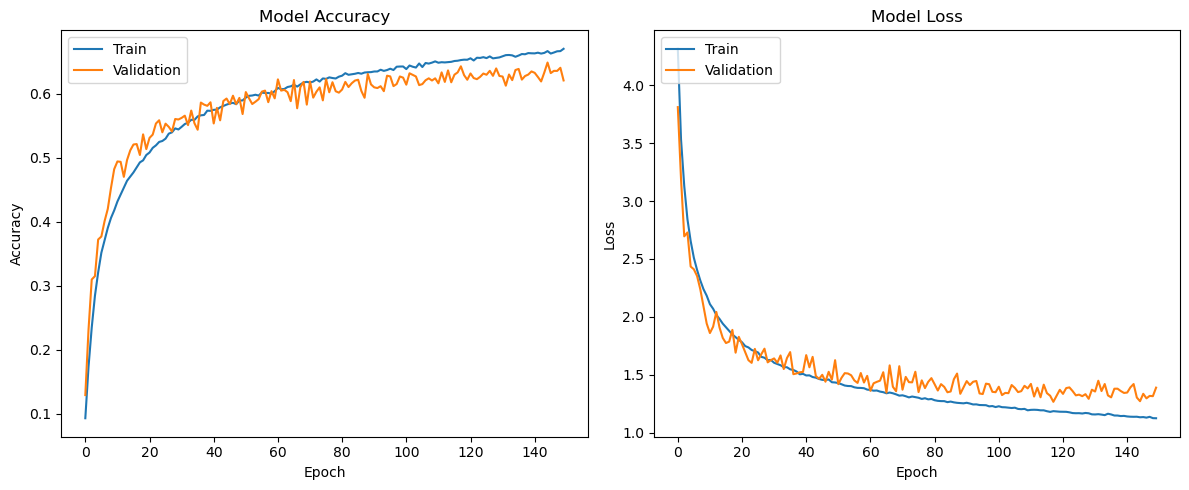

In [6]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=150, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/100
781/781 [==============================] - 50s 62ms/step - loss: 4.2197 - accuracy: 0.1002 - val_loss: 3.4847 - val_accuracy: 0.1657
Epoch 2/100
781/781 [==============================] - 48s 62ms/step - loss: 3.4315 - accuracy: 0.1882 - val_loss: 3.1249 - val_accuracy: 0.2350
Epoch 3/100
781/781 [==============================] - 48s 61ms/step - loss: 3.0231 - accuracy: 0.2532 - val_loss: 2.7489 - val_accuracy: 0.3130
Epoch 4/100
781/781 [==============================] - 49s 62ms/step - loss: 2.7653 - accuracy: 0.2994 - val_loss: 2.6291 - val_accuracy: 0.3358
Epoch 5/100
781/781 [==============================] - 49s 62ms/step - loss: 2.5787 - accuracy: 0.3355 - val_loss: 2.3479 - val_accuracy: 0.3937
Epoch 6/100
781/781 [==============================] - 48s 61ms/step - loss: 2.4646 - accuracy: 0.3583 - val_loss: 2.3125 - val_accuracy: 0.4085
Epoch 7/100
781/781 [==============================] - 49s 63ms/step - loss: 2.3574 - accuracy: 0.3794 - val_loss: 2.2906 - val_ac

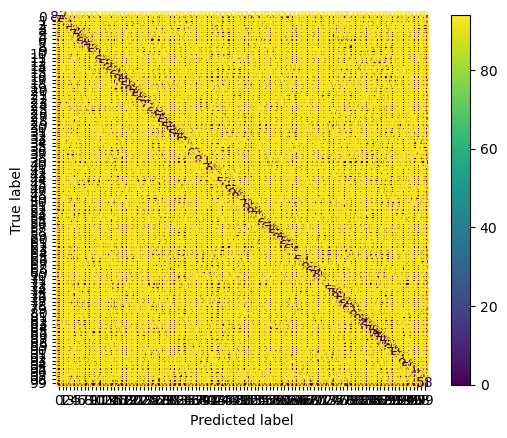

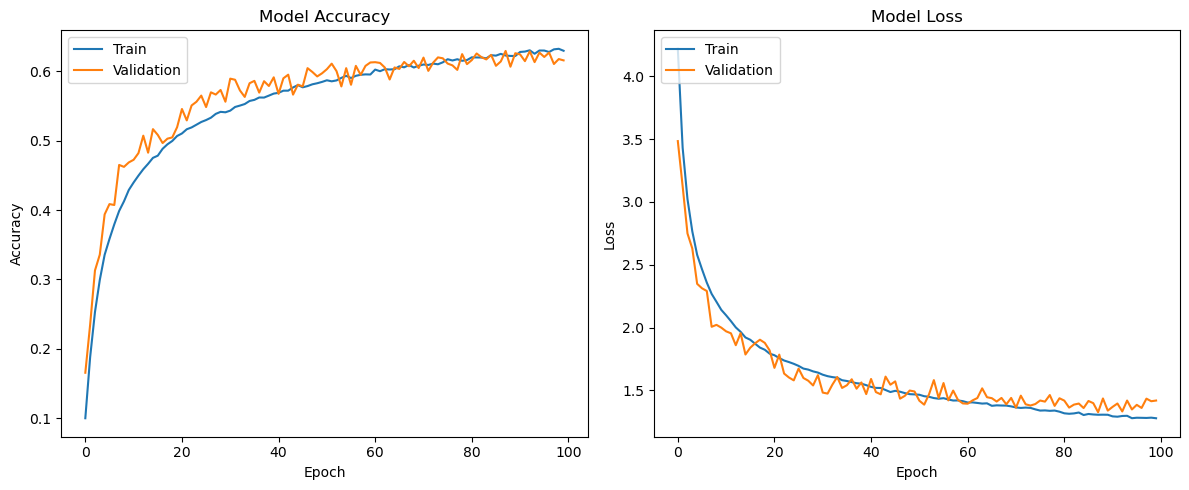

In [8]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=64),
                    steps_per_epoch = len(train_X) / 64, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/150
390/390 [==============================] - 46s 114ms/step - loss: 4.3425 - accuracy: 0.0899 - val_loss: 3.7332 - val_accuracy: 0.1408
Epoch 2/150
390/390 [==============================] - 43s 110ms/step - loss: 3.5546 - accuracy: 0.1702 - val_loss: 3.1389 - val_accuracy: 0.2363
Epoch 3/150
390/390 [==============================] - 42s 107ms/step - loss: 3.1696 - accuracy: 0.2304 - val_loss: 2.8940 - val_accuracy: 0.2870
Epoch 4/150
390/390 [==============================] - 43s 110ms/step - loss: 2.8868 - accuracy: 0.2750 - val_loss: 2.7106 - val_accuracy: 0.3175
Epoch 5/150
390/390 [==============================] - 43s 111ms/step - loss: 2.6866 - accuracy: 0.3138 - val_loss: 2.4150 - val_accuracy: 0.3742
Epoch 6/150
390/390 [==============================] - 42s 107ms/step - loss: 2.5423 - accuracy: 0.3396 - val_loss: 2.3900 - val_accuracy: 0.3895
Epoch 7/150
390/390 [==============================] - 43s 111ms/step - loss: 2.4337 - accuracy: 0.3615 - val_loss: 2.2651 -

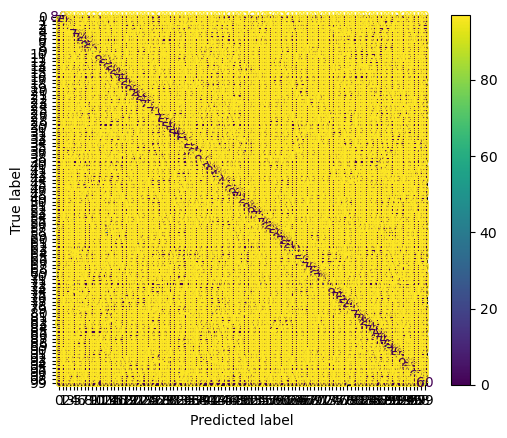

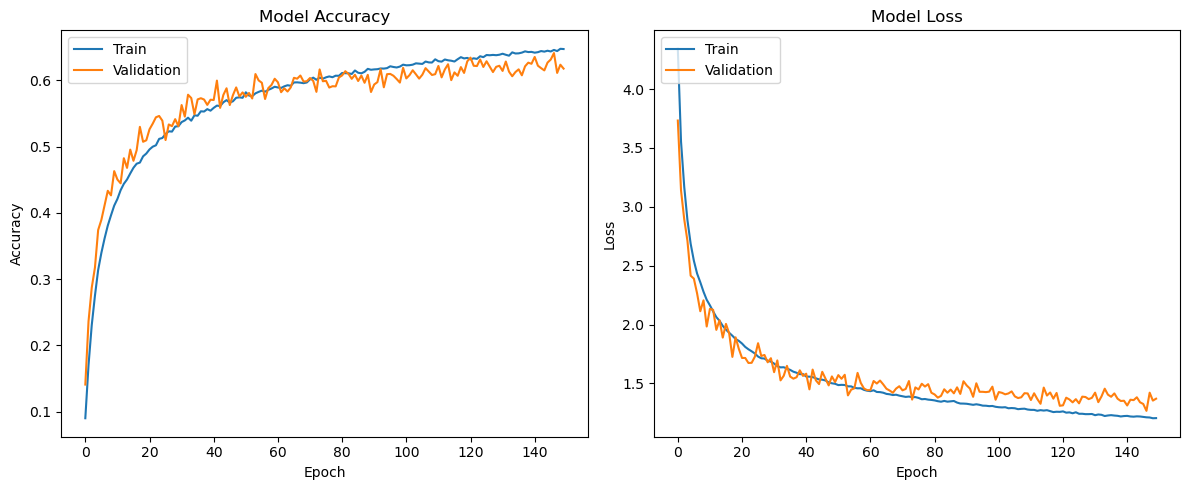

In [14]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=150, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/100
3125/3125 [==============================] - 83s 26ms/step - loss: 4.2084 - accuracy: 0.0911 - val_loss: 3.3951 - val_accuracy: 0.1826
Epoch 2/100
3125/3125 [==============================] - 81s 26ms/step - loss: 3.4036 - accuracy: 0.1821 - val_loss: 2.9977 - val_accuracy: 0.2610
Epoch 3/100
3125/3125 [==============================] - 79s 25ms/step - loss: 3.0849 - accuracy: 0.2357 - val_loss: 2.8929 - val_accuracy: 0.2838
Epoch 4/100
3125/3125 [==============================] - 77s 25ms/step - loss: 2.8972 - accuracy: 0.2734 - val_loss: 2.4739 - val_accuracy: 0.3588
Epoch 5/100
3125/3125 [==============================] - 78s 25ms/step - loss: 2.7311 - accuracy: 0.3042 - val_loss: 2.3442 - val_accuracy: 0.3814
Epoch 6/100
3125/3125 [==============================] - 78s 25ms/step - loss: 2.6074 - accuracy: 0.3282 - val_loss: 2.3261 - val_accuracy: 0.3976
Epoch 7/100
3125/3125 [==============================] - 80s 26ms/step - loss: 2.5157 - accuracy: 0.3489 - val_loss: 2

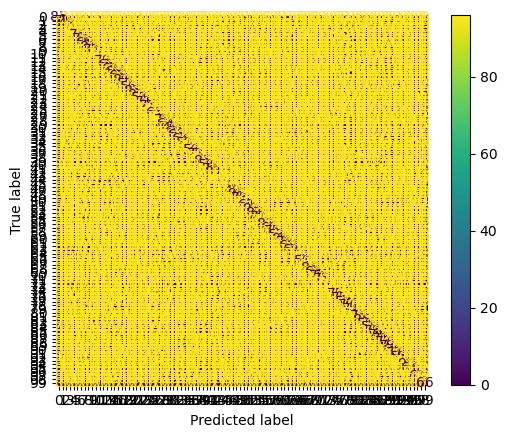

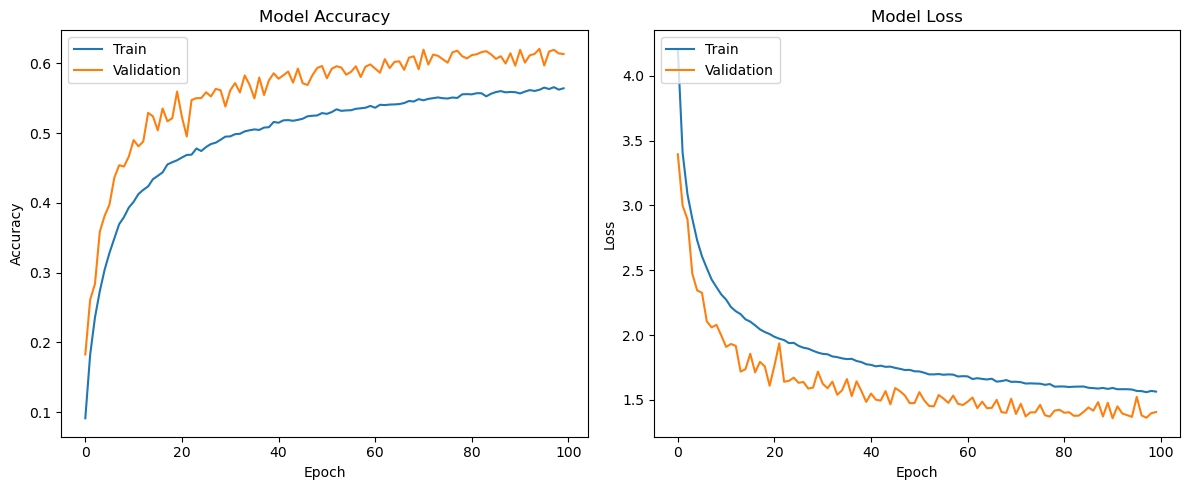

In [15]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=16),
                    steps_per_epoch = len(train_X) / 16, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/100
781/781 [==============================] - 49s 59ms/step - loss: 4.4432 - accuracy: 0.0701 - val_loss: 3.6698 - val_accuracy: 0.1469
Epoch 2/100
781/781 [==============================] - 46s 59ms/step - loss: 3.7146 - accuracy: 0.1406 - val_loss: 3.3968 - val_accuracy: 0.1871
Epoch 3/100
781/781 [==============================] - 47s 59ms/step - loss: 3.3194 - accuracy: 0.1974 - val_loss: 3.4213 - val_accuracy: 0.2000
Epoch 4/100
781/781 [==============================] - 46s 59ms/step - loss: 3.0312 - accuracy: 0.2432 - val_loss: 2.7645 - val_accuracy: 0.3016
Epoch 5/100
781/781 [==============================] - 48s 61ms/step - loss: 2.8107 - accuracy: 0.2835 - val_loss: 2.5309 - val_accuracy: 0.3460
Epoch 6/100
781/781 [==============================] - 47s 60ms/step - loss: 2.6534 - accuracy: 0.3152 - val_loss: 2.4082 - val_accuracy: 0.3620
Epoch 7/100
781/781 [==============================] - 51s 66ms/step - loss: 2.5198 - accuracy: 0.3410 - val_loss: 2.3177 - val_ac

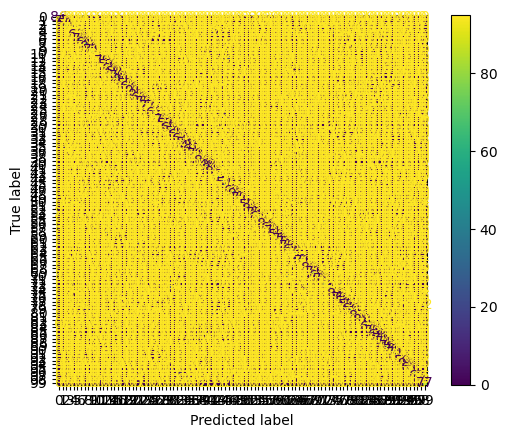

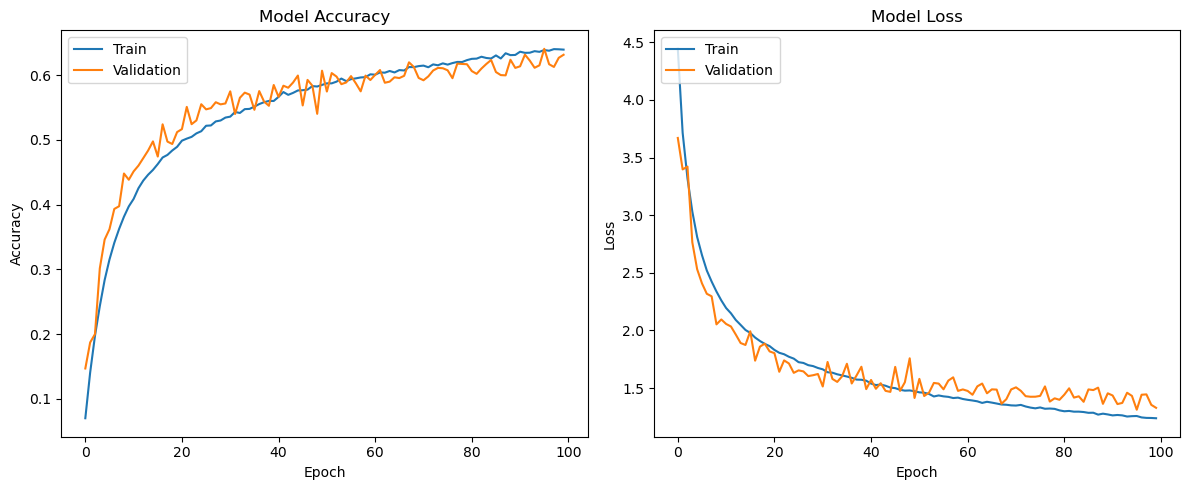

In [16]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))
    
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45)) 

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=64),
                    steps_per_epoch = len(train_X) / 64, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/100
390/390 [==============================] - 52s 127ms/step - loss: 4.3588 - accuracy: 0.0856 - val_loss: 3.6458 - val_accuracy: 0.1502
Epoch 2/100
390/390 [==============================] - 48s 122ms/step - loss: 3.5682 - accuracy: 0.1667 - val_loss: 3.1191 - val_accuracy: 0.2407
Epoch 3/100
390/390 [==============================] - 50s 128ms/step - loss: 3.1845 - accuracy: 0.2243 - val_loss: 3.0302 - val_accuracy: 0.2663
Epoch 4/100
390/390 [==============================] - 44s 112ms/step - loss: 2.9276 - accuracy: 0.2709 - val_loss: 2.7804 - val_accuracy: 0.3033
Epoch 5/100
390/390 [==============================] - 43s 111ms/step - loss: 2.7396 - accuracy: 0.3030 - val_loss: 2.5579 - val_accuracy: 0.3501
Epoch 6/100
390/390 [==============================] - 42s 108ms/step - loss: 2.5831 - accuracy: 0.3319 - val_loss: 2.4537 - val_accuracy: 0.3795
Epoch 7/100
390/390 [==============================] - 45s 114ms/step - loss: 2.4813 - accuracy: 0.3548 - val_loss: 2.2650 -

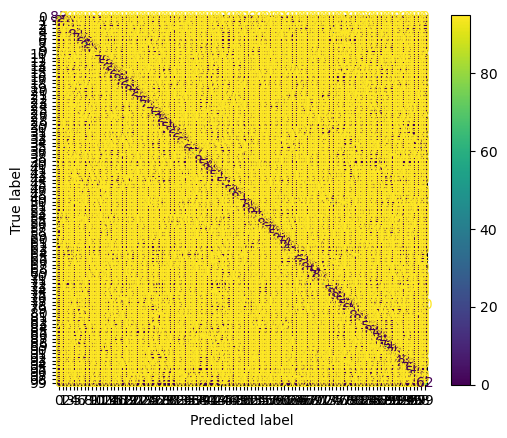

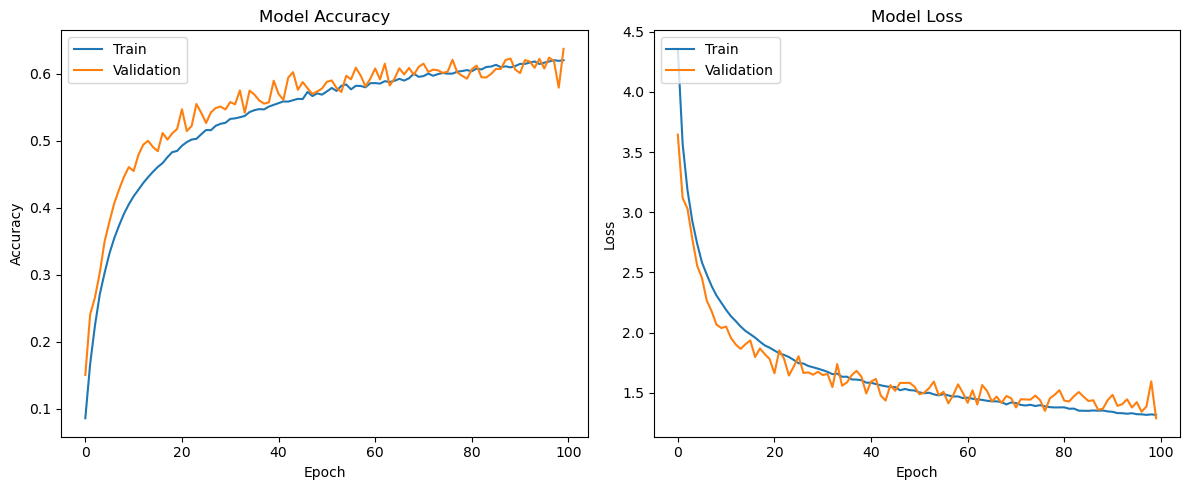

In [13]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/150
781/781 [==============================] - 52s 63ms/step - loss: 4.2144 - accuracy: 0.0993 - val_loss: 3.5323 - val_accuracy: 0.1855
Epoch 2/150
781/781 [==============================] - 47s 60ms/step - loss: 3.3973 - accuracy: 0.1886 - val_loss: 3.0659 - val_accuracy: 0.2595
Epoch 3/150
781/781 [==============================] - 47s 60ms/step - loss: 3.0106 - accuracy: 0.2531 - val_loss: 2.5686 - val_accuracy: 0.3382
Epoch 4/150
781/781 [==============================] - 47s 60ms/step - loss: 2.7490 - accuracy: 0.2998 - val_loss: 2.5264 - val_accuracy: 0.3508
Epoch 5/150
781/781 [==============================] - 47s 61ms/step - loss: 2.5798 - accuracy: 0.3317 - val_loss: 2.2516 - val_accuracy: 0.4035
Epoch 6/150
781/781 [==============================] - 47s 60ms/step - loss: 2.4506 - accuracy: 0.3597 - val_loss: 2.3291 - val_accuracy: 0.4043
Epoch 7/150
781/781 [==============================] - 48s 61ms/step - loss: 2.3435 - accuracy: 0.3809 - val_loss: 2.2027 - val_ac

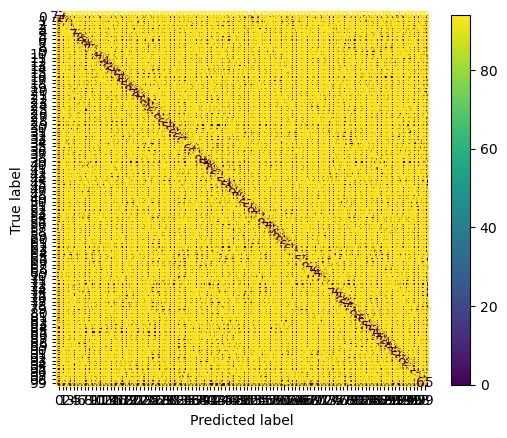

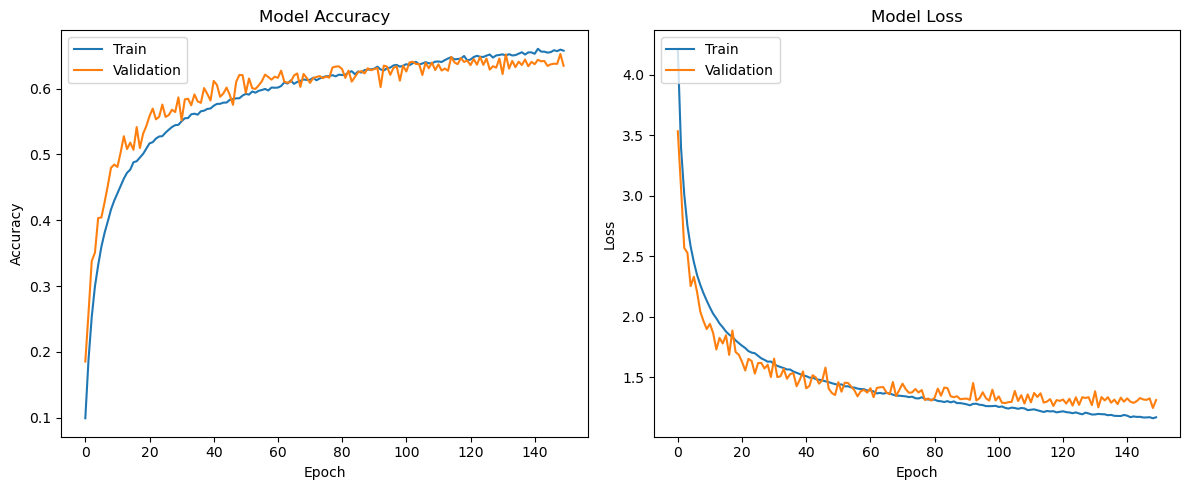

In [7]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=64),
                    steps_per_epoch = len(train_X) / 64, epochs=150, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)